# Caminhando por Chicago


Uma coisa que faremos bastante durante esse curso é observar objetos do mundo real e entender como podemos usar entidades matemáticas para representar esses objetos. Na verdade, às vezes fazemos isso sem saber. Isso aconteceu comigo quando visitei Chicago.

A cidade de Chicago (especialmente o centro) é famosa por ter somente ruas que vão no sentido norte-sul e no sentido leste-oeste (veja como isso é super diferente de cidades como São Paulo ou Roma!). Isso significa que, para indicar um caminho entre duas esquinas de Chicago, poderíamos simplesmente dizer: "ande duas quadras para o Leste e depois três quadras para o Norte". Claro que, com um bom visitante, eu demorei a decorar os nomes das ruas, então eu sempre entendia a cidade à partir da esquina onde ficava meu hotel. Então, andar duas quadras para o Leste e depois três quadras para o Norte operava mais ou menos assim:

In [53]:
import matplotlib.pyplot as plt

arrow_args = {
    'length_includes_head': True,
    'width': 0.05,
    'head_width': 0.15,
    'head_length': 0.1,
    'color': 'black',
}

movements = {
    'n' : (0, 1),
    's' : (0, -1),
    'l' : (1, 0),
    'o' : (-1, 0),
}

def draw_path(
        path: str | list[str],
        figsize: tuple[int, int] = (5, 5),
        limits: tuple[float, float] = (-1, 5),
        arrow_args: dict|list[dict] = arrow_args,
        movements: dict = movements
):    
    plt.figure(figsize=(5, 5))
    plt.grid('minor')
  
    loc_x = 0
    loc_y = 0
    plt.scatter(loc_x, loc_y, color='blue', s=100, alpha=0.5)
    if type(path)==list:
        for i, p in enumerate(path):
            loc_x = 0
            loc_y = 0

            for s in p:
                idx = s
                dx = movements[idx][0]
                dy = movements[idx][1]
                plt.arrow(loc_x, loc_y, dx, dy, **(arrow_args[i]))
                loc_x += dx 
                loc_y += dy
    else:
        loc_x = 0
        loc_y = 0
        for s in path:
            idx = s.lower()
            dx = movements[idx][0]
            dy = movements[idx][1]
            plt.arrow(loc_x, loc_y, dx, dy, **arrow_args)
            loc_x += dx 
            loc_y += dy
    
    plt.scatter(loc_x, loc_y, color='red', s=100, alpha=0.5)

    plt.xlim(limits)
    plt.ylim(limits)

    plt.show()

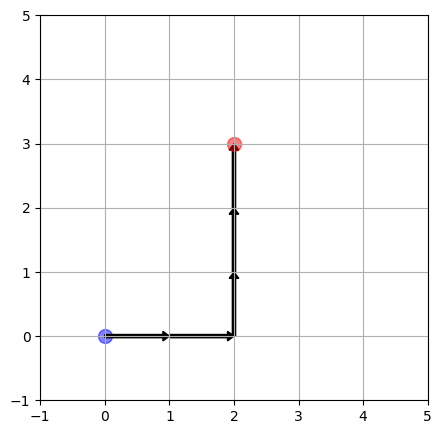

In [54]:
draw_path('llnnn')

Veja só como Chicago se parecia com um plano cartesiano - pelo menos na minha cabeça. Claro que toda a beleza arquitetônica da cidade se perde, mas essa *representação* foi útil para que eu me localizasse.

!!! info "Toda cidade se parece com um plano cartesiano?"
    Mais ou menos. Se assumimos que as coordenadas estão ligadas a latitude e longitude, por exemplo, então sim - mas nossos caminhos pelas ruas só seguem as coordenadas se a cidade tiver esse formato de "grid". Em São Paulo, seguir reto por uma rua significa fazer várias curvas, então essa simplificação não faria sentido.

Implicitamente, já temos algumas regras para como nosso modelo funciona:

1. Um passo do caminho é representado por uma seta
2. A próxima seta começa onde a anterior terminou
3. Só existem setas para o norte, sul, leste e oeste.
4. Toda seta representa o caminho ao longo de uma quadra.

**Exercício: Levando em consideração essas regras, encontre um *outro* caminho que também leva do ponto azul até o ponto vermelho na nossa figura.**

!!! info "Qualquer caminho vale? Então o caminho não importa?"
    Sim, qualquer caminho vale para a posição final.
    Não, o caminho pode importar em outros contextos, como escolher o caminho mais curto, ou passar por uma loja específica no caminho.

## Perdido em Chicago

Bem, se você já visitou alguma cidade nova, ou mesmo um bairro diferente dentro da sua própria cidade, provavelmente você já se perdeu.

Eu, pelo menos, me perdi bastante. Às vezes eu errava uma curva, esquecia algum caminho... e talvez tivesse que dar algumas voltas para chegar ao mesmo lugar:

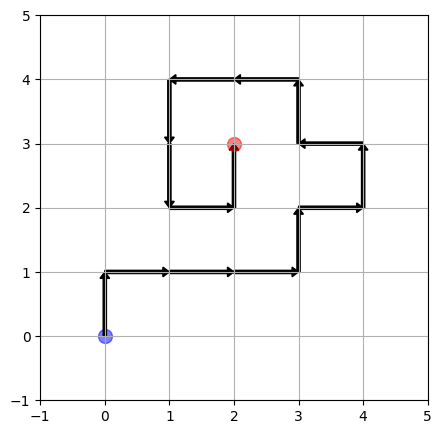

In [55]:
draw_path('nlllnlnonoossln')

Vamos voltar à propriedade *matemática* deste caminho. Acabamos de ver que *existem pelo menos dois caminhos para chegar ao mesmo lugar* em Chicago: tanto o caminho que você fez no exercício quando esse outro caminho que eu fiz um pouco perdidamente.

Agora que temos as "regras" do mundo, vamos começar a sistematizar nossos caminhos por Chicago trazendo para metáforas matemáticas.

## Posições

Podemos nos referir a qualquer esquina de Chicago (pelo menos nessa região bem comportada...) como: "partindo do hotel, vá x quadras para o leste e y quadras para o norte". Isso dá uma posição $(x,y)$ para cada esquina da Chicago. Veja como a posição é uma grandeza que tem duas dimensões (em Chicago: quadras para o leste e quadras para o norte). A notação matemática mais comum para esse tipo de grandeza multi-dimensional é o *vetor*:

$$
v = \begin{bmatrix} x \\ y \end{bmatrix}
$$

??? info "encontre $v$ sabendo que o caminho que fizemos foi andar 3 quadras para o leste, duas para o norte, 1 para o oeste e 1 para o sul"
    $$ \begin{bmatrix} 2 \\ 1 \end{bmatrix} $$


!!! info "Por que um vetor e não simplesmente um par $(x,y)$?
    Um par ordenado somente descreve a posição. O vetor, como veremos, permite uma série de operações.

## Deslocamentos

Veja como, implicitamente, definimos quatro operações matemáticas para o nosso modelo para representar os possíveis deslocamentos por Chicago:

| Deslocamento | Correspondente matemático |
| --- | --- | 
| Norte | Somar 1 na coordenada $y$ |
| Sul | Subtrair 1 na coordenada $y$ |
| Leste | Somar 1 na coordenada $x$ | 
| Oeste | Subtrair 1 na coordenada $x$ |

Vamos representar nosso "deslocamento" como um vetor:

$$
\Delta v = \begin{bmatrix} \Delta x \\ \Delta y\end{bmatrix}
$$

Veja como as instruções de concatenar caminhos se parecem com "somar deslocamentos". Então, podemos definir uma instrução de deslocamento como encontrar um vetor $v'$ tal que:

$$
v' = \begin{bmatrix} x + \Delta x\\ y + \Delta y \end{bmatrix}
$$

### Exemplo

Ao sair do hotel e andar uma quadra para o norte, teríamos:

$$
\begin{aligned}
v      = \begin{bmatrix} 0 \\ 0 \end{bmatrix} \\
\Delta v = \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\
v'     = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{aligned}
$$

Daí então, se andamos mais uma quadra, desta vez para o leste, daí partimos de onde paramos anteriormente e realizamos o deslocamento normalmente:

$$
\begin{aligned}
v      = \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\
\Delta v = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \\
v'     = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
\end{aligned}
$$

## Vários deslocamentos?

Rapidamente, podemos perceber que realizar vários deslocamentos ($\Delta v_1$, $\Delta v_2$, e assim por diante) levaria ao resultado:

$$
v' = \begin{bmatrix} x + \Delta x_1 + \Delta x_2 + \cdots + \Delta x_n \\ y + \Delta y_1 + \Delta y_2 + \cdots + \Delta y_n \end{bmatrix} 
$$

Veja como isso mostra que deslocamentos são *comutativos*, isto é, podemos fazer o deslocamento em *qualquer ordem* que o resultado será o mesmo! Isso acontece por que cada uma das *componentes* do vetor $v'$ é calculado por uma *soma* (em números reais), e a operação *soma* (para números reais) é *comutativa*. Isso significa que podemos andar 3 quadras para o norte e 2 para o leste em qualquer ordem, por exemplo:

$$
\begin{bmatrix} 1 + 1 + 0 + 0 + 0 \\ 0 + 0 + 1 + 1 + 1 \end{bmatrix} = \begin{bmatrix} 0 + 0 + 0 + 1 + 1 \\ 1 + 1 + 1 + 0 + 0 \end{bmatrix}
$$



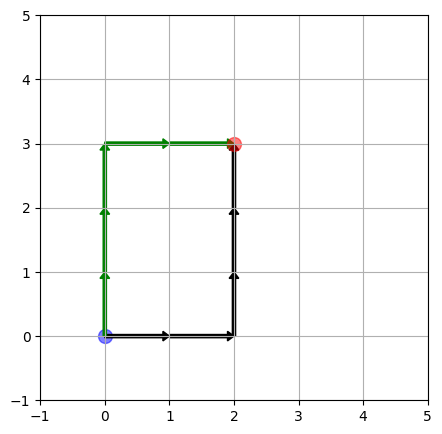

In [56]:
draw_path(['llnnn', 'nnnll'], arrow_args=[arrow_args, arrow_args | {'color' : 'green'}])

## Deslocamentos de tamanhos diferentes

Vamos agora pensar em deslocamentos de tamanhos diferentes. Imagine que temos um transportador mais rápido, que sempre anda por duas quadras na direção leste. Então, ao invés de dizer: "ande duas quadras na direção leste", diríamos: "pegue o transportador uma vez". Veja como nossos caminhos poderiam ser re-escritos:

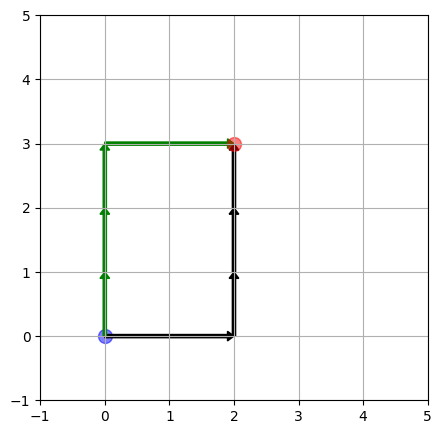

In [ ]:
draw_path(['Lnnn', 'nnnL'], arrow_args=[arrow_args, arrow_args | {'color' : 'green'}], movements=movements | {'L' : (2, 0)})

??? info "Quanto vale $\Delta v$ para o caso de usarmos o transportador?"
    $$ \begin{bmatrix} 2 \\ 0 \end{bmatrix} $$

??? info "Verifique se a propriedade de comutatividade também vale para caminhos que usam o transportador"
    A propriedade vale: 
    $$ \begin{bmatrix} 1 + 2 \\ 0 + 0 \end{bmatrix} = \begin{bmatrix} 2 + 1 \\ 0 + 0 \end{bmatrix} = \begin{bmatrix} 3 \\ 0 + 0 \end{bmatrix} $$

## Deslocando fora do grid!

Até agora, caminhamos somente ao longo do *grid* inspirado nas ruas de Chicago. Vamos dar um passo: vamos caminhar *em qualquer direção*, dando passos *de qualquer tamanho*. Seria como se usássemos um helicóptero para driblar o trânsito de Chicago!

Podemos representar esse tipo de movimento com um vetor deslocamento qualquer. Por exemplo, poderíamos usar:

$$
\Delta v = \begin{bmatrix} 2 \\ 3 \end{bmatrix}
$$

e, nesse caso, nosso caminho pela cidade poderia ser representado como:

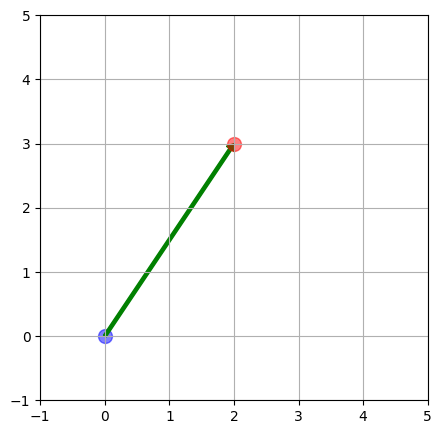

In [61]:
draw_path(['F'], arrow_args=[arrow_args | {'color' : 'green'}], movements=movements | {'F' : (2, 3)})

Só que, agora, ganhamos um problema novo: como nossas direções não são pré-definidas, precisamos *definir* as direções para onde podemos nos deslocar.

## Outras coisas que podem ser representadas por vetores

Vetores podem ser usados para representar outras coisas além de posições em Chicago. Obviamente, poderíamos usar vetores para representar posições de uma forma mais genérica. Na verdade, poderíamos representar várias coisas como vetores - ou ainda, como uma *posição no espaço*. Claro que não é possível representar *qualquer* coisa como um vetor.


### Exemplo: vetor velocidade

Bem, posições no espaço poderiam ser usadas para representar qualquer grandeza de várias dimensões. Na própria fisica, poderíamos pensar em um vetor velocidade. Veja como um vetor velocidade se comporta como um vetor posição:

1. Trata-se de um vetor com uma grandeza multi-dimensional, então podemos usar a notação:

$$
v = \begin{bmatrix} v_{x} \\ v_y \end{bmatrix}
$$

2. Podemos *somar* duas velocidades - por exemplo, quando um avião está voando numa direção, e há algum vento soprando em outra direção, e queremos saber a velocidade resultante em relação ao solo:

$$
v_{\text{resultante}} = v_{\text{avião}} + v_{\text{vento}}
$$

3. Podemos multiplicar nossa velocidade por algum fator $\alpha$, e isso continua tendo significado físico. Por exemplo, ao dobrar a velocidade de um corpo, encontramos:

$$
v_{\text{final}} = 2 v = \begin{bmatrix} 2 v_x \\ 2 v_y \end{bmatrix}
$$


## Exemplo: probabilidades

Vamos discutir a ideia de representar probabilidades de eventos discretos como um vetor. Daí, teríamos:

$$
x = \begin{bmatrix} P(e_1) \\ P(e_2) \\ \vdots \\ P(e_n) \end{bmatrix}
$$ 

Parece uma notação bastante conveniente - agora, $x$ representa completamente a distribuição de probabilidades dos eventos discretos que escolhemos. Porém, temos um problema: se fizermos uma soma, ou uma multiplicação por um fator escalar, então soma dos elementos de $x$ deixa de ser $1$, e, por isso, $x$ deixa de representar uma probabilidade. Bem, então, embora um vetor possa convenientemente representar uma distribuição de probabilidades, não poderíamos usar operações soma e multiplicação por escalar para esse caso. Então, essa representação de probabilidades não corresponde a um vetor "puro".

??? info "Se tenho uma lista de compras pedindo 2 pés de alface, 3 beterrabas e 1 cenoura, posso representá-la como um vetor? Argumente sobre se a representação faz sentido, e se as operações de soma e multiplicação por escalar ainda se aplicam."
    A representação seria algo como $x = \begin{bmatrix} a \\ b \\ c \end{bmatrix}$, onde $a$, $b$ e $c$ são as quantidades de alface, beterraba e cenoura. A soma ainda funciona - significa "juntar duas listas de compras numa lista só" - e a multiplicação também - significa "aumentar proporcionalmente a quantidade de todos os ingredientes".


??? info "Decidimos representar a alocação de horas em atividades ao longo das 24h de um dia como um vetor. Nesse caso, as operação de soma e multiplicação por escalar se aplicam?"
    Apesar da notação vetorial ser possível, as operações de soma e multiplicação por escalar não se aplicam.

